### This file shall be used to plot the distribution of total precipitations in August

The main question is to choose which data to select to plot the distribution, if we take the maximum only,
we will miss a lot of informations, but selecting all data makes us loose the independance.

For now I'll only plot the max distributions and then I'll look into the statistics poly to search for solutions.

In [24]:
import sys

sys.path.append('/nird/projects/NS9873K/emile/unseen-storm-forecasts/python_mapping/')
sys.path.append('/home/esauvat/Documents/NORCE/unseen-storm-forecasts/python_mapping/')

import numpy as np, xarray as xr
import matplotlib.pyplot as plt
import weatherdata as wd
import pickle

Loading the weatherset

In [25]:
wsPath = '/home/esauvat/Documents/NORCE/unseen-storm-forecasts/weathersets/continuous_0.5.pkl'

with open(wsPath, 'rb') as inp:
    tpSet = pickle.load(inp)

Function to plot the distributions

In [26]:
def plot_distribution(data:xr.DataArray, title:str, path:str, step:str|None=0.001) :
    """
    Plots the statistical distribution of the data.
    The data is regrouped into nearest values with a step of 1 mm.
    
    Parameters:
    data (xr.DataArray): Input data with dimensions "years" and coordinates as strings.
    """
    
    # Flatten the data to a 1D array
    flattened_data = data.values.flatten()
    
    # Define bin edges with a step of 0.001
    bin_edges = np.arange(np.nanmin(flattened_data), np.nanmax(flattened_data) + step, step)
    
    # Plot histogram
    plt.figure(figsize=(10, 6))
    plt.hist(flattened_data, bins=bin_edges, edgecolor='black', alpha=0.7)
    
    plt.xlabel('Precipitations (m)')
    plt.title(title)
    plt.grid(True, linestyle='--', alpha=0.6)
    
    plt.savefig(path)

    plt.show()

Distribution of maximums

In [27]:
# Importing data
data = xr.open_dataarray('/home/esauvat/Documents/NORCE/unseen-storm-forecasts/weathersets/results/continuous_hans-area-avg-daily_0.5_monthly-max')

# Selecting August's maxs
data = data.sel(months='aug').drop_vars("months")

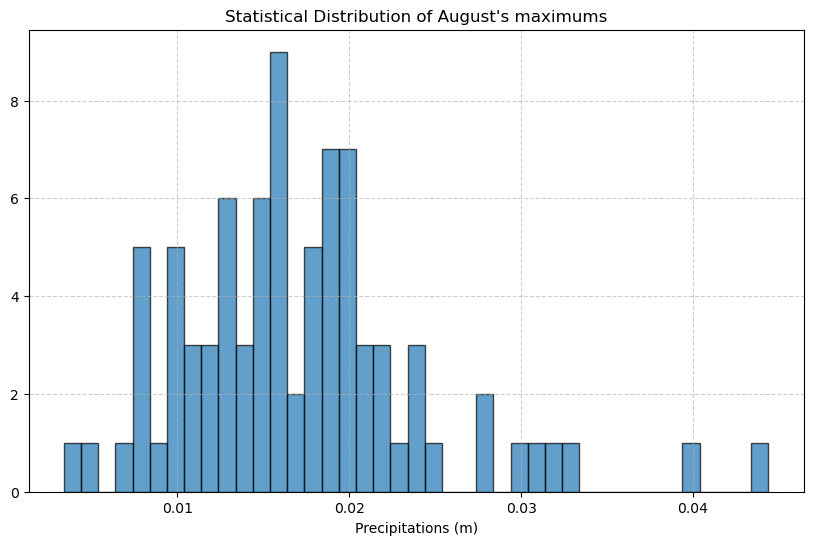

In [ ]:
# Plotting
plot_distribution(data, "Statistical Distribution of August's maximums", '/home/esauvat/Documents/NORCE/unseen-storm-forecasts/plots/aug_max_distrib/era5-HA-daily.png')

Distribution of means over 2 days maximums

In [29]:
# Importing data
mean2 = xr.open_dataarray('/home/esauvat/Documents/NORCE/unseen-storm-forecasts/weathersets/results/continuous_hans-area-avg-mean2_0.5_monthly-max')

# Selecting August's maxs
mean2 = mean2.sel(months='aug').drop_vars("months")

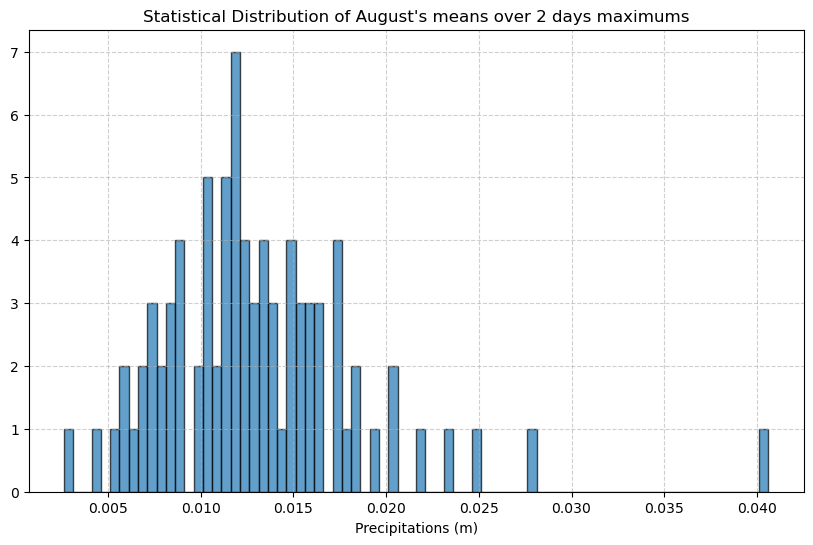

In [ ]:
# Plotting
plot_distribution(mean2, "Statistical Distribution of August's means over 2 days maximums", '/home/esauvat/Documents/NORCE/unseen-storm-forecasts/plots/aug_max_distrib/era5-HA-mean2.png', 5e-4)

Distributions of means over 3 days' maximums

In [31]:
# Importing data
mean3 = xr.open_dataarray('/home/esauvat/Documents/NORCE/unseen-storm-forecasts/weathersets/results/continuous_hans-area-avg-mean3_0.5_monthly-max')

# Selecting August's maxs
mean3 = mean3.sel(months='aug').drop_vars("months")

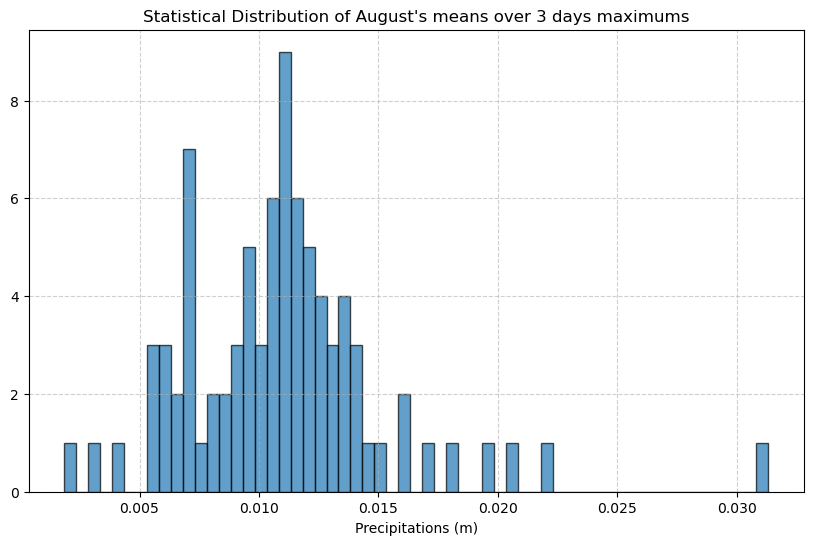

In [ ]:
# Plotting
plot_distribution(mean3, "Statistical Distribution of August's means over 3 days maximums", '/home/esauvat/Documents/NORCE/unseen-storm-forecasts/plots/aug_max_distrib/era5-HA-mean3.png', 5e-4)

## s2s dataset

In [33]:
wsPath = '/home/esauvat/Documents/NORCE/unseen-storm-forecasts/weathersets/s2s_0.5.pkl'

with open(wsPath, 'rb') as inp:
    tpSet = pickle.load(inp)

In [34]:
def plot_log_distribution(data: xr.DataArray, title: str, path: str, num_bins: int = 100, log_base: float = 2):
    """
    Plots the statistical distribution of the data with logarithmic binning on the x-axis.
    
    Parameters:
    data (xr.DataArray): Input data with dimensions "years" and coordinates as strings.
    title (str): Title of the plot.
    path (str): Path to save the plot.
    num_bins (int): Number of bins for logarithmic spacing (default: 100).
    log_base (float): Base of the logarithm for bin spacing (default: 2).
    """
    
    # Flatten the data to a 1D array and remove NaN and non-positive values
    flattened_data = data.values.flatten()
    flattened_data = flattened_data[~np.isnan(flattened_data) & (flattened_data > 0)]
    
    # Define logarithmically spaced bins with a smaller base
    min_val = np.min(flattened_data)
    max_val = np.max(flattened_data)
    bin_edges = np.logspace(np.log(min_val) / np.log(log_base), np.log(max_val) / np.log(log_base), num_bins, base=log_base)
    
    # Plot histogram with log bins
    plt.figure(figsize=(10, 6))
    plt.hist(flattened_data, bins=bin_edges, edgecolor='black', alpha=0.7)
    
    # Set logarithmic scale for the x-axis
    plt.xscale('log', base=log_base)
    
    plt.xlabel(f'Precipitations (m, log base {log_base})')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.grid(True, linestyle='--', alpha=0.6, which="both")  # Grid for both major/minor ticks
    
    plt.savefig(path)
    plt.show()

In [35]:
def plot_simlog_distribution(data: xr.DataArray, title: str, path: str, num_bins: int = 100, log_base: float = 2):
    """
    Plots the statistical distribution with a mixed linear-log scale:
    - Linear for x <= 0.005
    - Logarithmic for x > 0.005
    
    Parameters:
    data (xr.DataArray): Input data with dimensions "years" and coordinates as strings.
    title (str): Title of the plot.
    path (str): Path to save the plot.
    num_bins (int): Number of bins for spacing (default: 100).
    """
    
    # Flatten data and remove NaNs
    flattened_data = data.values.flatten()
    flattened_data = flattened_data[~np.isnan(flattened_data) & (flattened_data > 0)]
    
    # Define bin edges (logarithmic for large values, linear for small ones)
    min_val = np.min(flattened_data)
    max_val = np.max(flattened_data)
    bin_edges = np.logspace(np.log(min_val) / np.log(log_base), np.log(max_val) / np.log(log_base), num_bins, base=log_base)

    # Plot histogram
    plt.figure(figsize=(10, 6))
    plt.hist(flattened_data, bins=bin_edges, edgecolor='black', alpha=0.7)
    
    # Use a symlog scale with transition at 0.005
    plt.xscale('symlog', linthresh=0.005)

    plt.xlabel('Precipitations (m)')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.grid(True, linestyle='--', alpha=0.6, which="both")  # Major/minor ticks
    
    plt.savefig(path)
    plt.show()

In [36]:
def plot_splitted_distribution(data: xr.DataArray, title: str, path: str, threshold: float, num_bins_log: int = 50, num_bins_lin: int = 50):
    """
    Plots the statistical distribution with:
    - Logarithmic scale for x < threshold
    - Linear scale for x > threshold
    - Threshold is visually centered on the x-axis

    Parameters:
    data (xr.DataArray): Input data with dimensions "years".
    title (str): Title of the plot.
    path (str): Path to save the plot.
    threshold (float): The manually chosen x-value where log → linear transition happens.
    num_bins_log (int): Number of bins in the log-scaled region.
    num_bins_lin (int): Number of bins in the linear region.
    """

    # Flatten the data and remove NaNs
    flattened_data = data.values.flatten()
    flattened_data = flattened_data[~np.isnan(flattened_data) & (flattened_data > 0)]
    
    # Determine min and max values
    x_min, x_max = np.min(flattened_data), np.max(flattened_data)

    # Separate data into log and linear regions
    log_data = flattened_data[flattened_data < threshold]
    lin_data = flattened_data[flattened_data >= threshold]

    # Define logarithmic bins for x < threshold
    if len(log_data) > 0:
        log_bins = np.logspace(np.log10(x_min), np.log10(threshold), num_bins_log)
    else:
        log_bins = []

    # Define linear bins for x > threshold
    if len(lin_data) > 0:
        lin_bins = np.linspace(threshold, x_max, num_bins_lin)
    else:
        lin_bins = []

    # Combine bin edges, ensuring continuity
    bin_edges = np.concatenate((log_bins, lin_bins[1:])) if len(log_bins) > 0 and len(lin_bins) > 0 else log_bins or lin_bins

    # Plot histogram
    plt.figure(figsize=(10, 6))
    plt.hist(flattened_data, bins=bin_edges, edgecolor='black', alpha=0.7)

    # Set appropriate x-axis scaling
    plt.xscale('log')

    # Adjust x-axis limits to center the threshold
    left_space = np.log10(threshold/x_min)
    right_space = x_max - threshold
    plt.xticks(list(np.logspace(x_min, threshold, 7)) + list(np.linspace(threshold, x_max, 7)))

    plt.xlabel('Precipitations (m)')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.grid(True, linestyle='--', alpha=0.6, which="both")

    plt.savefig(path)
    plt.show()

Distribution of maximums

In [37]:
# Importing data
data = xr.open_dataarray('/home/esauvat/Documents/NORCE/unseen-storm-forecasts/weathersets/results/s2s-hans_area-0.5-aug_daily_max.nc')

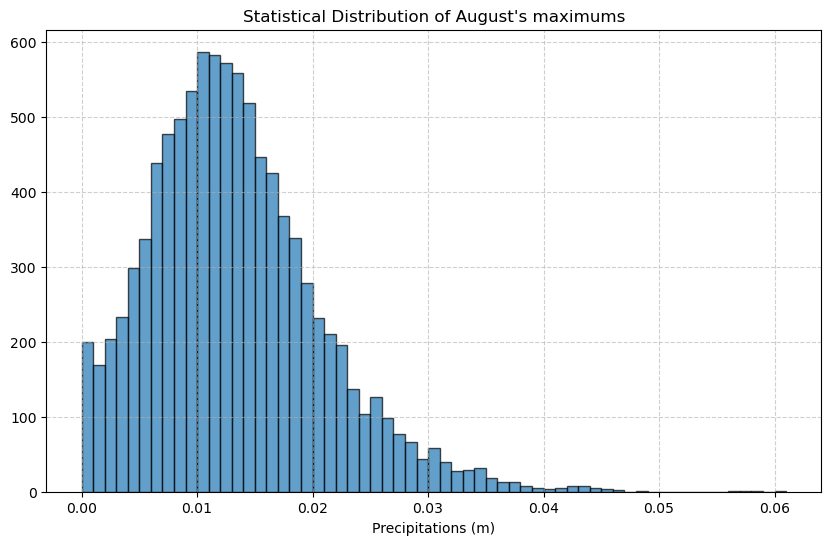

In [ ]:
# Plotting
plot_distribution(data, "Statistical Distribution of August's maximums", '/home/esauvat/Documents/NORCE/unseen-storm-forecasts/plots/aug_max_distrib/s2s-HA-daily.png')

Distribution of means over 2 days maximums

In [39]:
# Importing data
mean2 = xr.open_dataarray('/home/esauvat/Documents/NORCE/unseen-storm-forecasts/weathersets/results/s2s-hans_area-0.5-aug_mean2_max.nc')

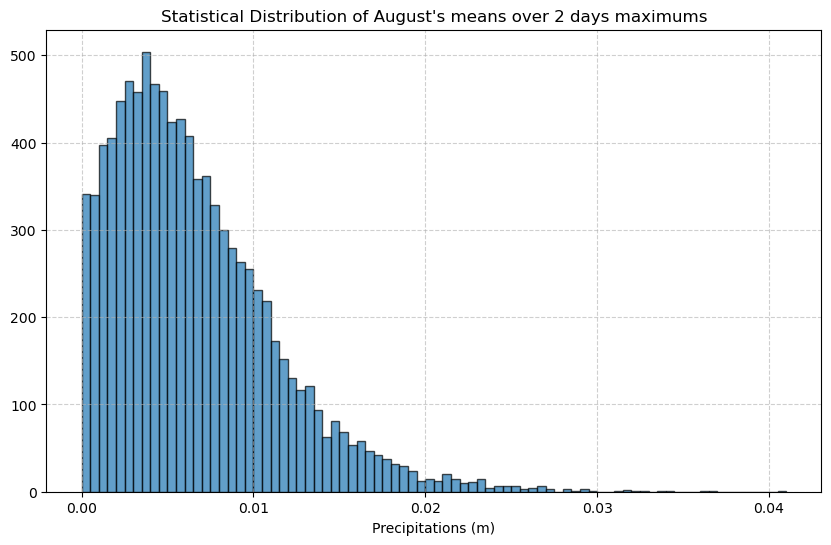

In [ ]:
# Plotting
plot_distribution(mean2, "Statistical Distribution of August's means over 2 days maximums", '/home/esauvat/Documents/NORCE/unseen-storm-forecasts/plots/aug_max_distrib/s2s-HA-mean2.png', 5e-4)

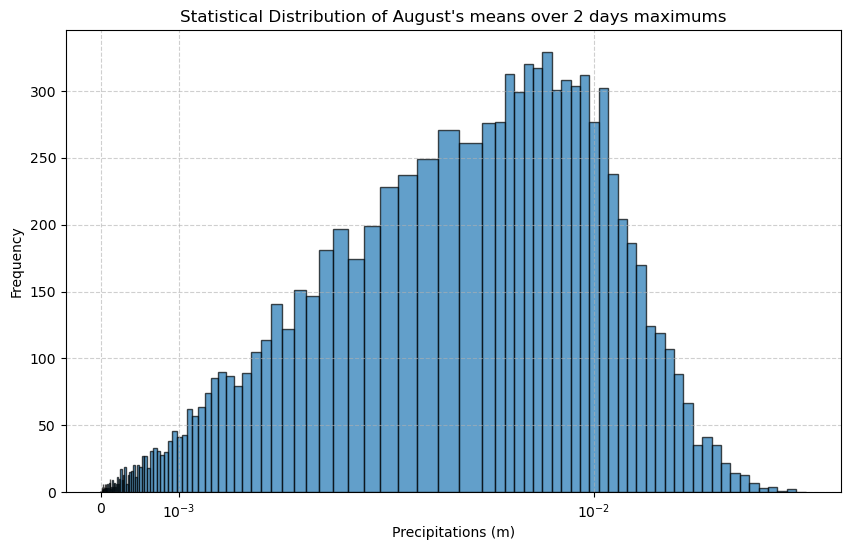

In [ ]:
plot_simlog_distribution(mean2, "Statistical Distribution of August's means over 2 days maximums", '/home/esauvat/Documents/NORCE/unseen-storm-forecasts/plots/aug_max_distrib/s2s-HA-mean2-simlog.png', num_bins=200)

Distributions of means over 3 days' maximums

In [43]:
# Importing data
mean3 = xr.open_dataarray('/home/esauvat/Documents/NORCE/unseen-storm-forecasts/weathersets/results/s2s-hans_area-0.5-aug_mean3_max.nc')

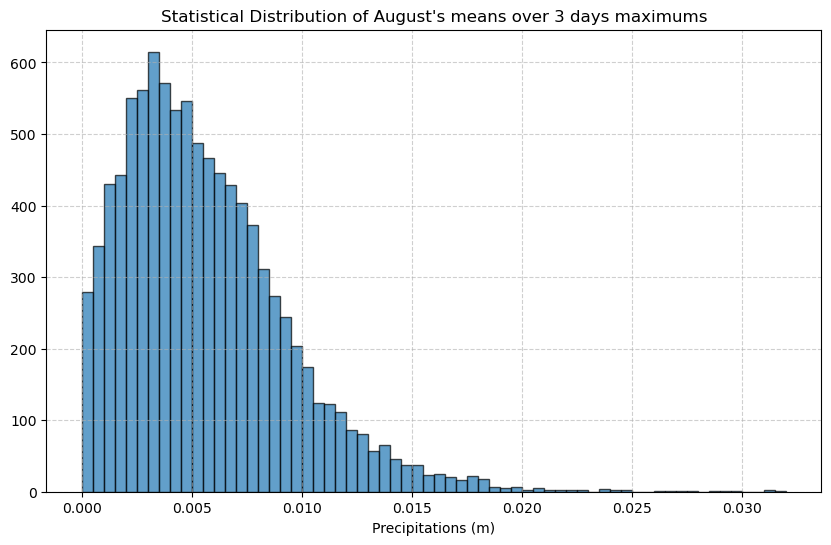

In [ ]:
# Plotting
plot_distribution(mean3, "Statistical Distribution of August's means over 3 days maximums", '/home/esauvat/Documents/NORCE/unseen-storm-forecasts/plots/aug_max_distrib/s2s-HA-mean3.png', 5e-4)

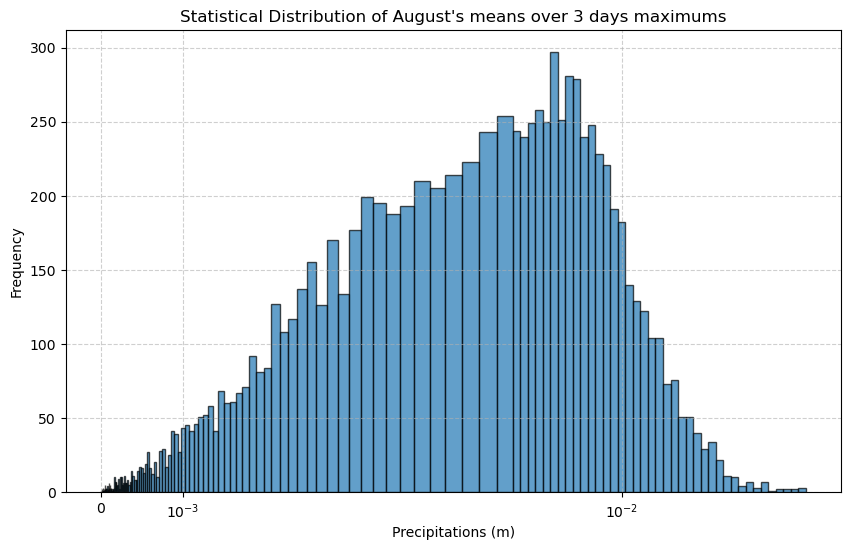

In [ ]:
plot_simlog_distribution(mean3, "Statistical Distribution of August's means over 3 days maximums", '/home/esauvat/Documents/NORCE/unseen-storm-forecasts/plots/aug_max_distrib/s2s-HA-mean3-simlog.png', num_bins=200)